# A minimal model for the dipole response during strong-field ionisation

### The minimal model used to investigate the complex dipole response induced by a strong-field in the paper
### "Phase evolution of strong-field ionisation" 

This paper investigates the evolution of the dipole response during strong-field ionisation. It is proposed that the complex dynamics are a result of the interplay of strong-field ionisation and strong-field excitation, as sketched below:

<img src="../Images/mechanism_sketch_both.png" width="300" />

An NIR-pump pulse drives SFI of a 5p electron either (a) directly into the continuum---purple arrow---or (b) into bound states lying close to the ionization threshold---solid green arrow. The excited bound states can also be populated reversibly via polarization of the ground state (b, dashed green arrow). The characteristics of the 5p hole are captured through the promotion of a 4\d electron into the vacancy by a time-delayed XUV-probe pulse (black arrow).

To investigate the interplay of SFI and SF-excitation and the resulting dipole response, here we adopt a minimal model, comprising of just three channels: one effective ionisation channel and two channels to model transient excited states.

In [1]:
import numpy as np
import helper_functions as hf
from scipy.integrate import cumulative_trapezoid
from plotting import plot_model_lineshapes, plot_model_amplitudes, plot_model_complex

First, we set up the energy and time axes:

In [2]:
# Set up the energy axis:
e_res = 55  # energy of the resonance
e_axis = np.arange(e_res - 4, e_res + 4 + 0.01, 0.01)
L = 0.122  # Literature Linewidth

# Set up the time axis:
time = np.arange(-10, 10, 0.1)
time_au = hf.fs_to_au(time)

The minimal model takes a time-dependent amplitude for each channel. We base the amplitudes for each channel on the driving NIR pulse:

In [3]:
FWHM = 186 # in atomic units
freq = 0.06798 # in atomic units
intensity = 0.8 # in units of 10^14 Wcm^-2

envelope = hf.gauss_envelope(intensity, time, FWHM)
IR = hf.pulse(intensity, time, FWHM, freq)

We then work out the amplitude of the population in each channel. The ionisation channel is based on the cummulative integral of the squared NIR pulse, and the excitation channels are the squared NIR pulse. We also consider smoothed ionisation/excitation channels which neglect the 2 $\omega_{NIR}$ oscillations.

In [4]:
# Magnitude of populations:
ion_pop = cumulative_trapezoid(IR**2, time_au, initial=0)

excited_pop = (IR**2)
excited_pop2 = np.append(np.zeros(3), IR[:-3])**2
smooth_excited = envelope**2

We then rescale these populations to match those obtained directly from RMT calculations for an NIR intensity of $0.8\times10^{14} Wcm^{-2}$:

<img src="../Images/populations_with_field.png" width="600" />

Note: the excitation channels are scaled to half the total excited population (since we consider two of them).


In [5]:
# Rescale Populations:
max_ion = 0.08
max_excited = 0.03

ion_pop *= max_ion/np.amax(ion_pop)
excited_pop *= max_excited/np.amax(excited_pop)
excited_pop2 *= max_excited/np.amax(excited_pop2)
smooth_excited *= max_excited/np.amax(smooth_excited)



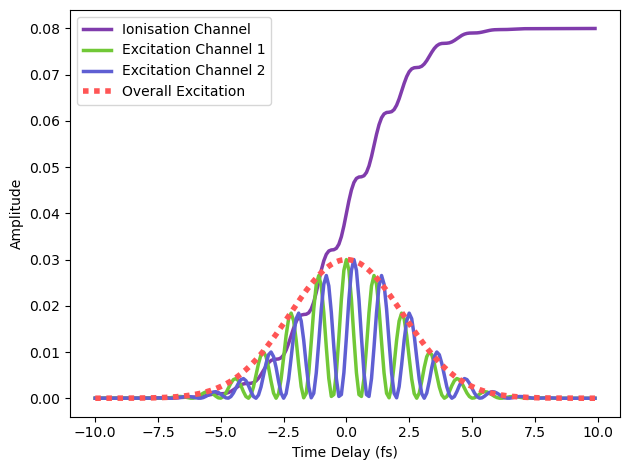

In [6]:
plot_model_amplitudes(time, ion_pop, excited_pop, excited_pop2, smooth_excited)


Each effective channel is assigned a corresponding dipole phase. The dipole phase for each channel remains constant, but the phase of the coherent sum varies due to the time-dependent amplitudes.

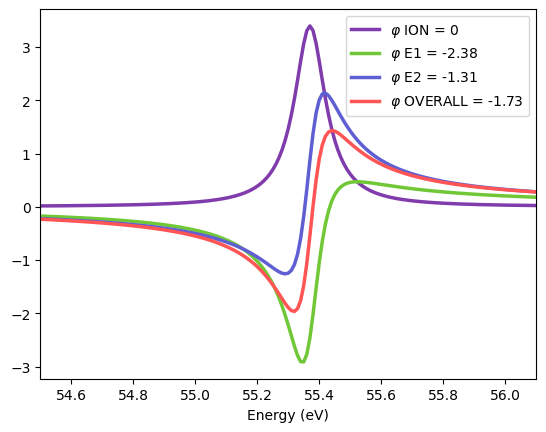

In [7]:
ion_phase = 0
excited_phase_1 = -2.38
excited_phase_2 = -1.31
smooth_excited_phase = -1.73

plot_model_lineshapes(e_axis, [ion_phase, excited_phase_1, excited_phase_2, smooth_excited_phase])

We then coherently sum these channels, obtaining the corresponding lineshape and then fitting to get the amplitude/phase of the dipole response.

First, we consider only the ionisation channel. (We set the amplitudes of the other two channels to 0).

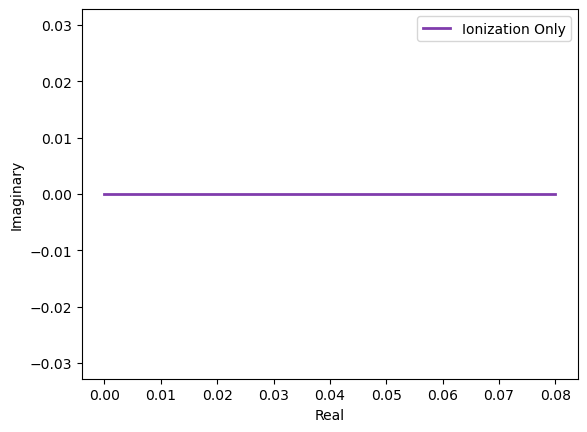

In [8]:
ion_response = hf.model(Max_ION=0.08, Max_E1=0, Max_E2=0)
plot_model_complex([ion_response], labels=['Ionization Only'])

Considering only the ionisation channel, the observed dipole response remains strictly real, growing in magnitude with the ionization yield.

We now add a second channel for strong-field excitation with a non-zero dipole phase ($\varphi_1=-2.38$).

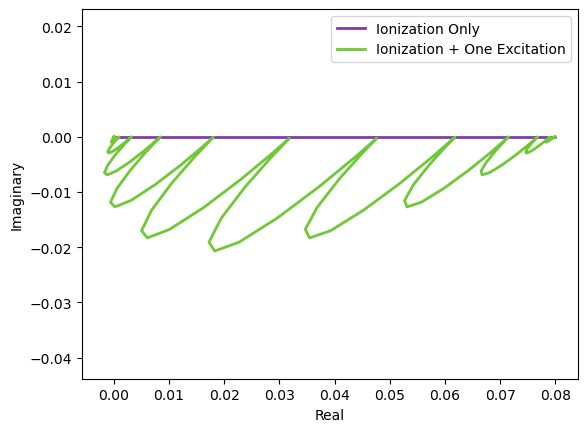

In [9]:
two_channel_response = hf.model(Max_ION=0.08, Max_E1=0.03, Max_E2=0)
plot_model_complex([ion_response, two_channel_response],
                   labels=['Ionization Only', 'Ionization + One Excitation'])

Adding a second channel for strong-field excitation with a non-zero dipole phase produces oscillations in the dipole response, but fails to reproduce the observed behavior, particularly the characteristic loops and dip.

To capture the full behavior, we introduce a third excitation channel. First, let's consider this second ionisation channel to have the same amplitude and phase as the first:

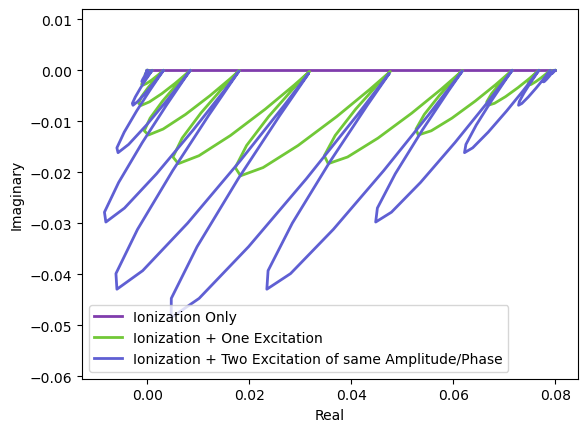

In [10]:
three_channel_dipole_response =  hf.model(Max_ION=0.08, Max_E1=0.03, Max_E2=0.03, 
                                          Phi_E1=-2.2, Phi_E2=-2.2)
plot_model_complex([ion_response, two_channel_response, three_channel_dipole_response],
                   labels=['Ionization Only', 'Ionization + One Excitation', 'Ionization + Two Excitation of same Amplitude/Phase'])

We can see that this has just increased the magnitude of the oscillations but we still do not produce the characteristic loops and dip.

Now let's consider this second ionisation channel to have a different, non-zero phase to the first ($\varphi_2=-1.31$).

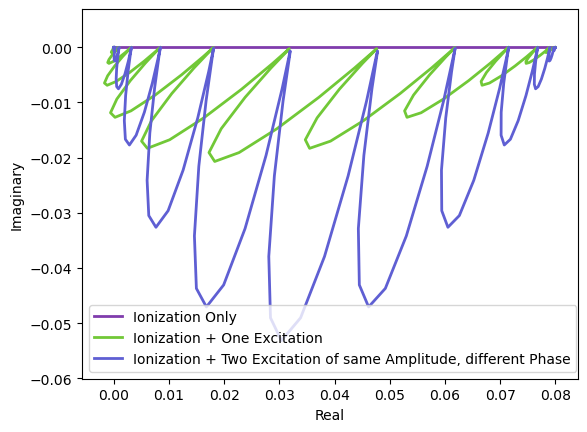

In [11]:
three_channel_dipole_response =  hf.model(Max_ION=0.08, Max_E1=0.03, Max_E2=0.03, 
                                          Phi_E1=-2.2, Phi_E2=-1.3)
plot_model_complex([ion_response, two_channel_response, three_channel_dipole_response],
                   labels=['Ionization Only', 'Ionization + One Excitation', 'Ionization + Two Excitation of same Amplitude, different Phase'])


Again, we do not recover the correct loop/dip structure. To obtain this, we must introduce a time-delay between the two excitation channels.

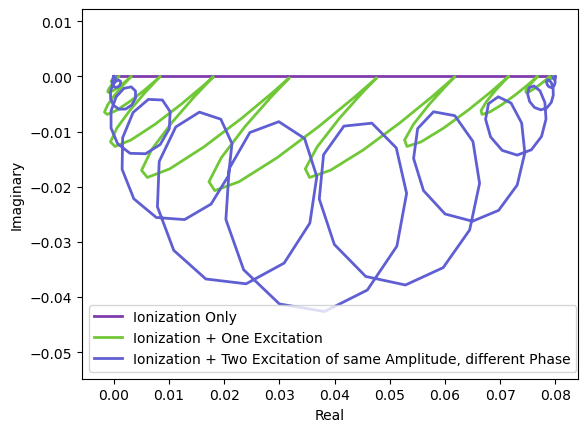

In [12]:
three_channel_dipole_response =  hf.model(Max_ION=0.08, Max_E1=0.03, Max_E2=0.03, 
                                          Phi_E1=-2.3, Phi_E2=-1.3, 
                                          excited_delay=0.3, 
                                          time=np.arange(-10, 10, 0.1))
plot_model_complex([ion_response, two_channel_response, three_channel_dipole_response],
                   labels=['Ionization Only', 'Ionization + One Excitation', 'Ionization + Two Excitation of same Amplitude, different Phase'])

To obtain just the dip (no loops) we model the amplitudes of the different channels using only the envelope of the NIR pulse (i.e. neglecting the $\omega_{NIR}$ oscillations).

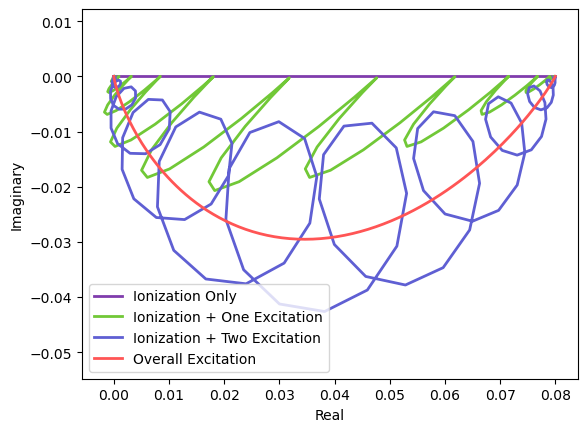

In [13]:
smooth_dipole_response =  hf.model(Max_ION=0.08, Max_E1=0.03, Max_E2=0.0, 
                                          Phi_E1=-1.75, Phi_E2=-1.75, 
                                          excited_delay=0, 
                                          smooth=True)
plot_model_complex([ion_response, two_channel_response, three_channel_dipole_response, smooth_dipole_response],
                   labels=['Ionization Only', 'Ionization + One Excitation', 'Ionization + Two Excitation', 'Overall Excitation'])

We can investigate the influence of time-delay between the two effective excitation channels.

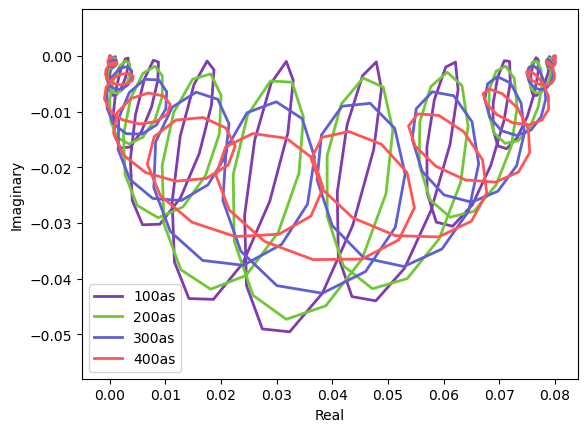

In [14]:
delay_100as =  hf.model(Max_ION=0.08, Max_E1=0.03, Max_E2=0.03, 
                                          Phi_E1=-2.3, Phi_E2=-1.3, 
                                          excited_delay=0.1)
delay_200as =  hf.model(Max_ION=0.08, Max_E1=0.03, Max_E2=0.03, 
                                          Phi_E1=-2.3, Phi_E2=-1.3, 
                                          excited_delay=0.2)
delay_300as =  hf.model(Max_ION=0.08, Max_E1=0.03, Max_E2=0.03, 
                                          Phi_E1=-2.3, Phi_E2=-1.3, 
                                          excited_delay=0.3)
delay_400as =  hf.model(Max_ION=0.08, Max_E1=0.03, Max_E2=0.03, 
                                          Phi_E1=-2.3, Phi_E2=-1.3, 
                                          excited_delay=0.4)
plot_model_complex([delay_100as, delay_200as, delay_300as, delay_400as],
                   labels=['100as', '200as', '300as', '400as'])

The time-delay changes the characteristics of the loops, but not the overall dip.

We can also investigate the influence of the relative magnitude of the different channels. For example, increasing the amplitude of the ionisation channel:

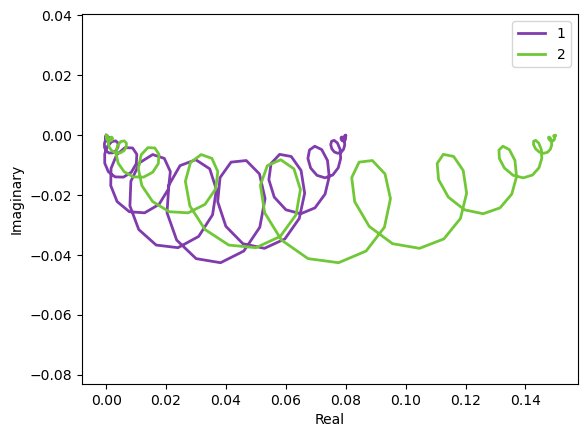

In [15]:

three_channel_dipole_response =  hf.model(Max_ION=0.08, Max_E1=0.03, Max_E2=0.03, 
                                          Phi_E1=-2.3, Phi_E2=-1.3, 
                                          excited_delay=0.3)
three_channel_dipole_response2 =  hf.model(Max_ION=0.15, Max_E1=0.03, Max_E2=0.03, 
                                          Phi_E1=-2.3, Phi_E2=-1.3, 
                                          excited_delay=0.3)
plot_model_complex([three_channel_dipole_response, three_channel_dipole_response2])

In [16]:
paramdict = {
    'IR_FWHM' : 186, # FWHM of NIR pulse in atomic units of time
    'IR_freq' : 0.06798, # Frequency of NIR pulse in atomic units
    'Max_ION' : 0.08, # Maximum amplitude of the ionisation channel
    'Max_E1' : 0.03, # Maximum amplitude of the 1st excitation channel
    'Max_E2' : 0.03, # Maximum amplitude of the 2nd excitation channel
    'Phi_ION' : 0, # Phase assigned to the ionisation channel
    'Phi_E1' : -2.2, # Phase assigned to the 1st excitation channel
    'Phi_E2' : -1.3, # Phase assigned to the 2nd excitation channel
    'excited_delay' : 0.3, # delay between the two excitation channels in femtoseconds
    'time' : np.arange(-10, 10, 0.1), # the time axis used
    'smooth' : False # Boolean to indicate whether to plot the overal excitation or not
}

In [17]:
dipole_response = hf.model(**paramdict)

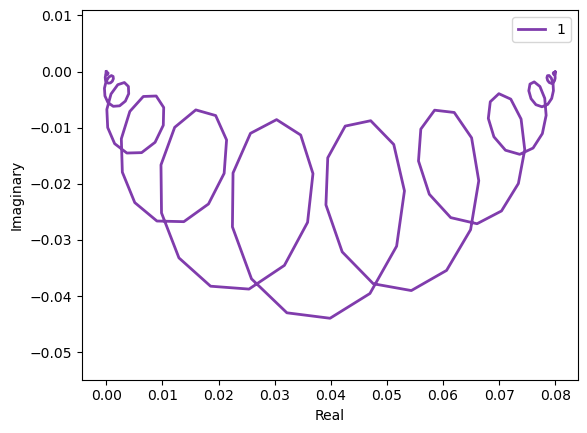

In [18]:
plot_model_complex([dipole_response])